In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [119]:
df = pd.read_excel('stockindex.xlsx')
df = df.iloc[-730:].reset_index()
data = df["Findex-Close"].values


In [120]:
def fourier_series(series, n_terms):
    # Get the time indices
    t = np.arange(len(series))
    
    # Compute Fourier coefficients
    coeffs = np.fft.fft(series)
    
    # Truncate coefficients beyond n_terms
    coeffs[n_terms+1:-n_terms] = 0
    
    # Reconstruct the signal using inverse Fourier transform
    reconstructed = np.fft.ifft(coeffs).real
    
    return reconstructed



error for 1 = 189272596.08257765
error for 2 = 154462132.2494557
error for 4 = 100951022.90319882
error for 8 = 62541959.91327443
error for 16 = 36538177.39817306
error for 32 = 20293311.632343635


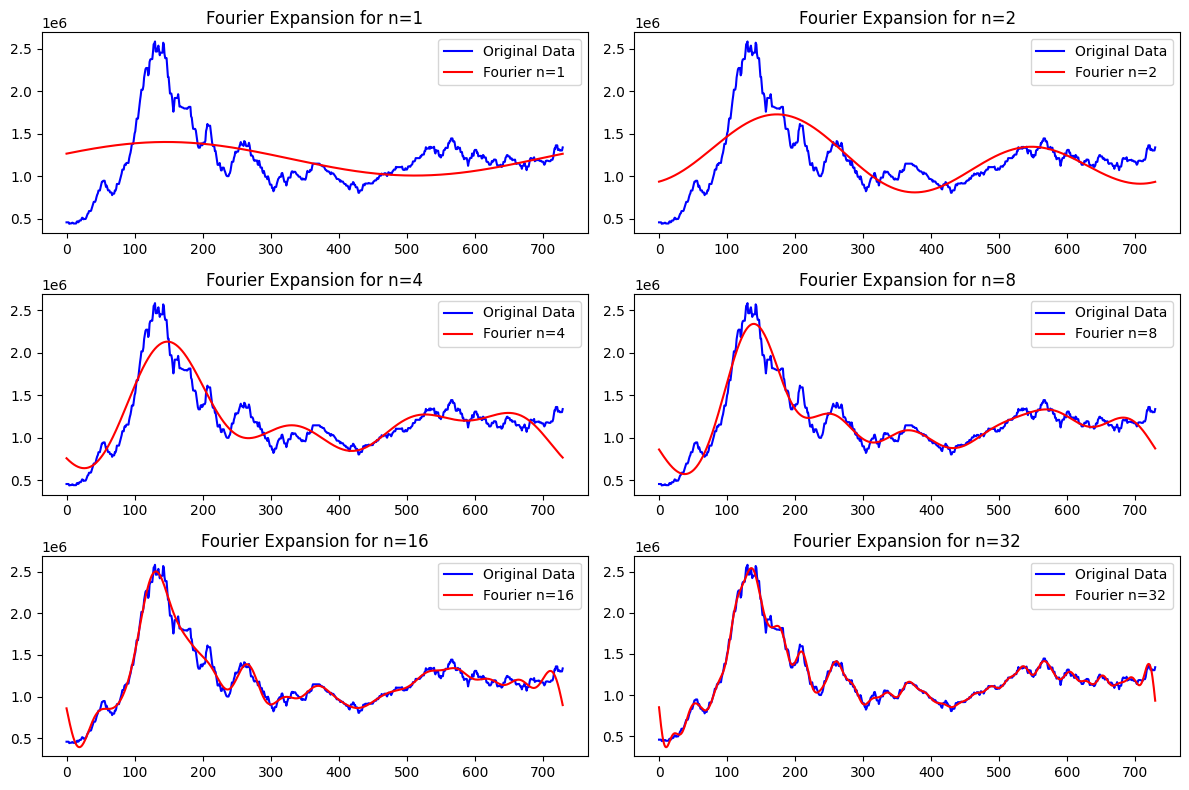

In [121]:

# Values of n for which Fourier expansion will be calculated
n_values = [1, 2, 4, 8, 16, 32]

# Plotting the results for different n values
plt.figure(figsize=(12, 8))
d1e = []
for n in n_values:
    # Calculate Fourier expansion
    reconstructed_data = fourier_series(data, n)

    # Plot original vs reconstructed data
    plt.subplot(3, 2, n_values.index(n) + 1)
    plt.plot(data, label='Original Data', color='blue')
    plt.plot(reconstructed_data, label=f'Fourier n={n}', color='red')
    plt.title(f'Fourier Expansion for n={n}')
    plt.legend()
    err = sum(abs(reconstructed_data - data))
    d1e.append(err)
    print('error for', n, '=', err)


plt.tight_layout()
plt.show()


In [122]:
# random_indices = [100, 500, 900, 1400]
random_indices = [100, 300, 500, 700]

min_value, max_value = df['Findex-Close'].min(), df['Findex-Close'].max()
df_r = df.copy()

for idx in random_indices:
    df_r.loc[idx, 'Findex-Close'] = np.random.uniform(min_value, max_value)  
data2 = df_r["Findex-Close"].values


error for 1 = 189734701.83223248
error for 2 = 154857644.3436782
error for 4 = 101800356.78948934
error for 8 = 63721465.34328073
error for 16 = 37365617.6125974
error for 32 = 21597711.290941723


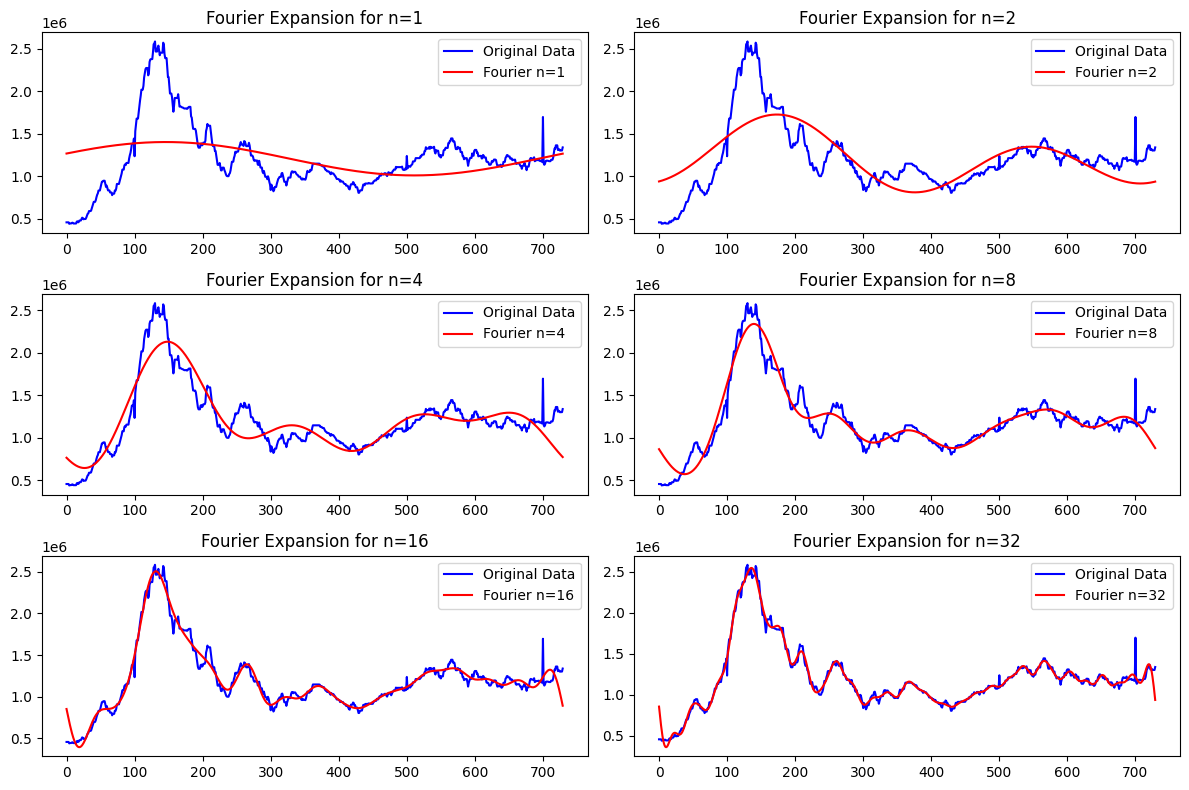

In [123]:
# Plotting the results for different n values
plt.figure(figsize=(12, 8))
d2e = []
for n in n_values:
    # Calculate Fourier expansion
    reconstructed_data2 = fourier_series(data2, n)

    # Plot original vs reconstructed data
    plt.subplot(3, 2, n_values.index(n) + 1)
    plt.plot(data2, label='Original Data', color='blue')
    plt.plot(reconstructed_data2, label=f'Fourier n={n}', color='red')
    plt.title(f'Fourier Expansion for n={n}')
    plt.legend()
    # err = sum(abs(reconstructed_data2 - data))
    err = sum(abs(reconstructed_data2 - data2))
    d2e.append(err)
    print('error for', n, '=', err)

plt.tight_layout()
plt.show()

In [124]:
d_errors = np.array(d2e) - np.array(d1e)

In [125]:
j = 0
for i in n_values:
    print('Error for n =', i, 'changed by', d_errors[j])
    j = j + 1

Error for n = 1 changed by 462105.7496548295
Error for n = 2 changed by 395512.0942225158
Error for n = 4 changed by 849333.8862905204
Error for n = 8 changed by 1179505.430006303
Error for n = 16 changed by 827440.2144243419
Error for n = 32 changed by 1304399.6585980877


In [126]:
dp_errors = ((np.array(d2e) - np.array(d1e))/np.array(d2e))*100

In [127]:
j = 0
for i in n_values:
    print('Error for n =', i, 'increased by', dp_errors[j], '%')
    j = j + 1

Error for n = 1 increased by 0.24355362787743137 %
Error for n = 2 increased by 0.2554036617945376 %
Error for n = 4 increased by 0.8343132706762892 %
Error for n = 8 increased by 1.8510331230646735 %
Error for n = 16 increased by 2.2144427612655857 %
Error for n = 32 increased by 6.039527249098681 %


In [128]:
m = 1000
d1_errors = 0
d2_errors = 0
for _ in range (m):
    random_indices = []
    for i in range(4):
        random_indices.append(int(np.random.uniform(0,730)))

    df_r = df.copy()

    for idx in random_indices:
        df_r.loc[idx, 'Findex-Close'] = np.random.uniform(min_value, max_value)  
    datap = df_r["Findex-Close"].values

    dpe = []
    for n in n_values:
        # Calculate Fourier expansion
        reconstructed_datap = fourier_series(datap, n)
        err = sum(abs(reconstructed_datap - datap))
        dpe.append(err)
    d1_errors = d1_errors + np.array(dpe) - np.array(d1e)
    d2_errors = d2_errors + ((np.array(dpe) - np.array(d1e))/np.array(dpe))*100

In [129]:
j = 0
for i in n_values:
    print('Mean Error for n =', i, 'increased by', d2_errors[j]/m, '%')
    j = j + 1

Mean Error for n = 1 increased by 0.6951565298562927 %
Mean Error for n = 2 increased by 0.9797385174005939 %
Mean Error for n = 4 increased by 1.989501857145103 %
Mean Error for n = 8 increased by 3.8469748750563997 %
Mean Error for n = 16 increased by 7.754803696765451 %
Mean Error for n = 32 increased by 16.447455278592145 %


In [130]:
j = 0
for i in n_values:
    print('Mean Error for n =', i, 'changed by', d1_errors[j]/m)
    j = j + 1

Mean Error for n = 1 changed by 1331450.795596517
Mean Error for n = 2 changed by 1536263.1519196297
Mean Error for n = 4 changed by 2060530.180758129
Mean Error for n = 8 changed by 2522432.120764629
Mean Error for n = 16 changed by 3120227.054826831
Mean Error for n = 32 changed by 4119419.7811267287
